In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_excel("C:\\Users\\tushk\\Downloads\\_Все случаи по стране за день в динамике_2023-11-15_11-29-24.xlsx")

In [4]:
data.head()

,Дата,Заражений за день,Выздоровлений за день,Смертей за день
0,2020-03-12,34,0,0
1,2020-03-13,11,0,0
2,2020-03-14,14,0,0
3,2020-03-15,4,3,0
4,2020-03-16,28,2,0


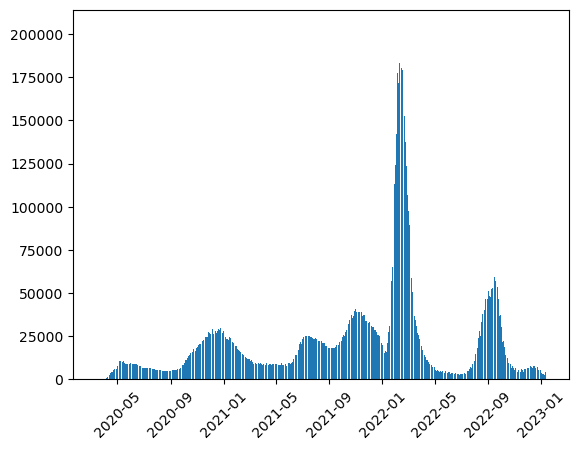

In [68]:
plt.bar(data['Дата'], data['Заражений за день'])
plt.xticks(rotation = 45)
plt.show()

In [52]:
data['Дата']

0      2020-03-12
1      2020-03-13
2      2020-03-14
3      2020-03-15
4      2020-03-16
          ...    
1033   2023-01-09
1034   2023-01-10
1035   2023-01-11
1036   2023-01-12
1037   2023-01-13
Name: Дата, Length: 1038, dtype: datetime64[ns]

In [71]:
data_new = data.copy()

fd = 1038
N = 1038 # длина входного массива.

spectrum = np.fft.rfft(data['Заражений за день'])

freq = np.fft.rfftfreq(N, 1./fd) 


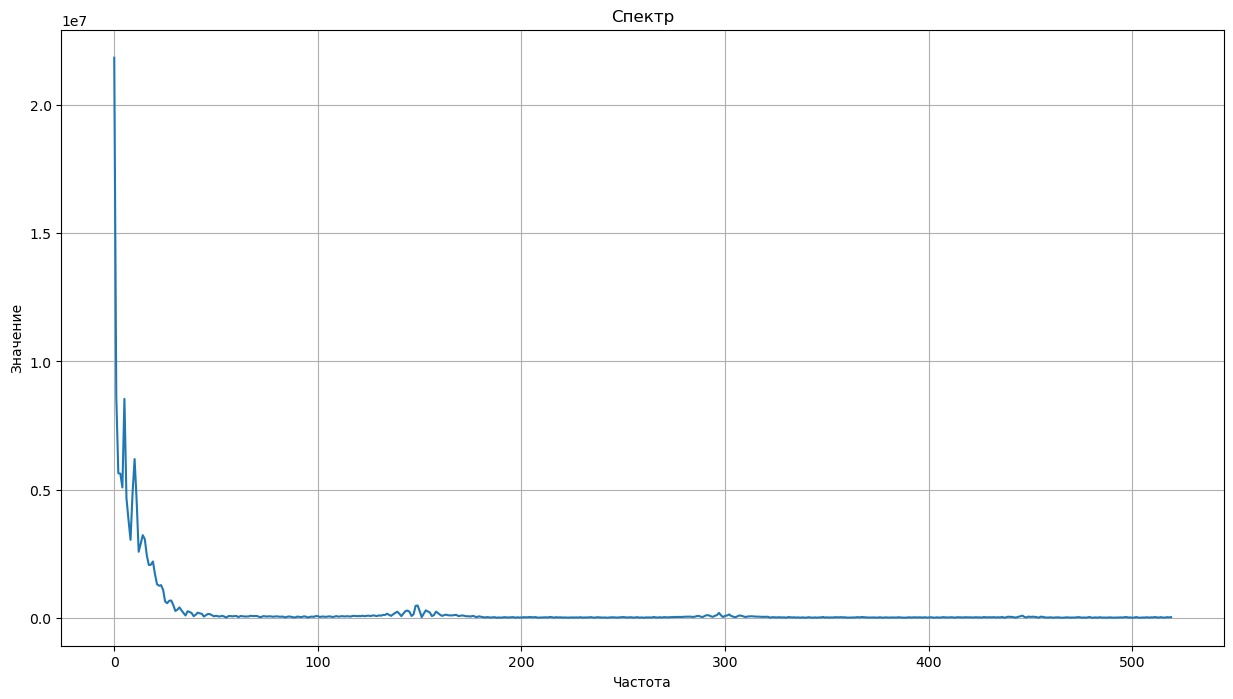

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.plot(freq, np.abs(spectrum))
plt.xlabel(u'Частота')
plt.ylabel(u'Значение')
plt.title(u'Спектр')
plt.grid(True)
#plt.ylim(0, 1700)
plt.show()

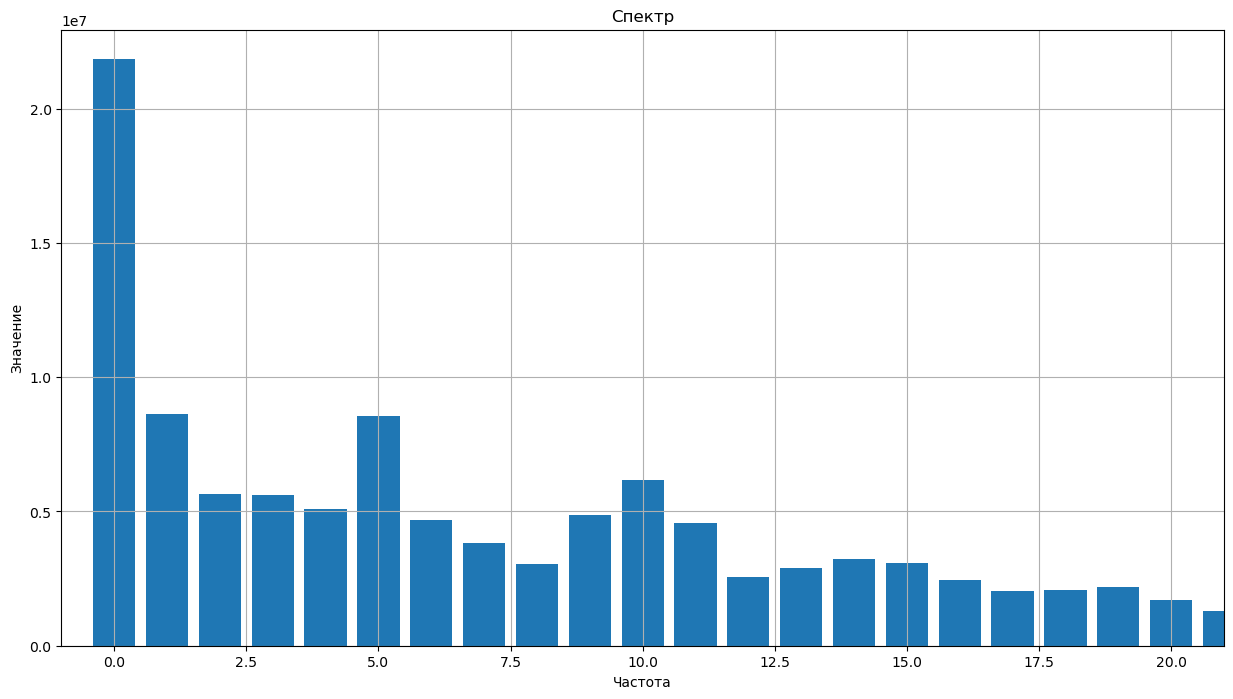

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.bar(freq, abs(spectrum))
plt.xlabel(u'Частота')
plt.ylabel(u'Значение')
plt.title(u'Спектр')
plt.xlim(-1, 21)
plt.grid(True)
plt.show()

In [136]:
from scipy.signal import argrelextrema
idx_maximas = argrelextrema(np.array(data['Заражений за день']), np.greater, order=75)[0]

In [141]:
idx_maximas

array([ 60, 287, 484, 604, 701, 918], dtype=int64)

In [140]:
for i in range (0, len(idx_maximas)):
    print (data['Дата'][idx_maximas[i]])

2020-05-11 00:00:00
2020-12-24 00:00:00
2021-07-09 00:00:00
2021-11-06 00:00:00
2022-02-11 00:00:00
2022-09-16 00:00:00


In [173]:
diff = abs(np.diff(data['Заражений за день']))

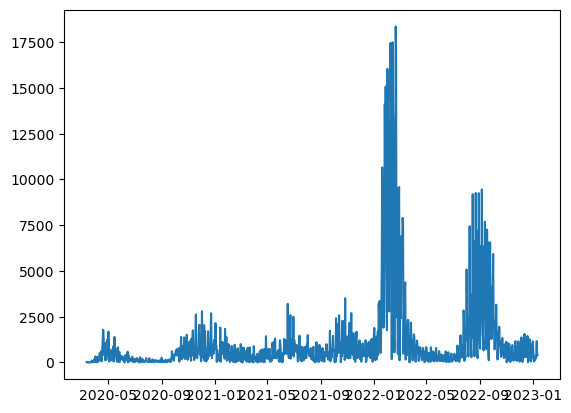

In [174]:
plt.plot(data['Дата'][:1037], diff)